In [1]:
require("/home/amit/Downloads/SemVII/QuDynamics.jl/src/QuDynamics.jl")

 in depwarn at deprecated.jl:73
 [inlined code] from deprecated.jl:694
 in require at no file:0
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/amit/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /home/amit/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[1], in expression starting on line 1


In [2]:
using PyPlot

In [3]:
using QuDynamics
using QuBase

In [4]:
immutable QuLindbladMasterEqTD <: QuEquation{0} end

In [5]:
c_const = 299792458
N = 20             # number of cavity fock states
wc = (c_const/(1300.03))*(2*pi) 
wl = wc;
delta1 = wl-wc
# psi0 = tensor(basis(N,0)) 
psi0 = statevec(1, FiniteBasis(N))
QFactorCavity = 10^5 #QFactor cavity
KappaOUT = wc/QFactorCavity

# Parameters for pumping

KappaIN=1*KappaOUT 
FluxPhotons =1
Multiplicator = 1
E=sqrt(KappaIN)*sqrt(FluxPhotons)
Input_Tstart = 1 #nanoseconds
Input_TWidth = 0.3/2.355 #nanoseconds
sizeT=1000
T=2
tlist = linspace(0,T,sizeT)


# def H1_coeffGauss(t, args):
#    return np.exp(-((t-Input_Tstart)/(sqrt(2)*Input_TWidth)) ** 2)
 
# output = mesolve(H, psi0, tlist,c_op_list, [])
# N_c = expect(a.dag() * a,output.states)

# plt.rc('text', usetex=True)
# plt.rc('font', family='arial',size=20)

# fig, axes = plt.subplots(1, 1, figsize=(10,6))
# plt.plot(tlist, N_c, "ro")

linspace(0.0,2.0,1000)

In [6]:
psi0 = statevec(1, FiniteBasis(N))
a  = tensor(lowerop(N))
H0 = -delta1*a'*a
H1 = im*E*(a'-a)
# H = [H0,[H1,H1_coeffGauss]]
c_op_list = Array(QuBase.QuArray,1)
c_op_list[1] = sqrt(KappaOUT) * a

20x20 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: SparseMatrixCSC{Float64,Int64}

	[1 ,  2]  =  3.80648
	[2 ,  3]  =  5.38318
	[3 ,  4]  =  6.59302
	[4 ,  5]  =  7.61296
	[5 ,  6]  =  8.51155
	[6 ,  7]  =  9.32393
	[7 ,  8]  =  10.071
	[8 ,  9]  =  10.7664
	[9 , 10]  =  11.4194
	[10, 11]  =  12.0371
	[11, 12]  =  12.6247
	[12, 13]  =  13.186
	[13, 14]  =  13.7245
	[14, 15]  =  14.2425
	[15, 16]  =  14.7424
	[16, 17]  =  15.2259
	[17, 18]  =  15.6945
	[18, 19]  =  16.1495
	[19, 20]  =  16.5921

In [7]:
function fn_1(H0, H1, t)
    H0 + H1*exp(-((t-Input_Tstart)/(sqrt(2)*Input_TWidth))^2)
end

fn_1 (generic function with 1 method)

In [8]:
function QuDynamics.operator(qu_eq::QuLindbladMasterEqTD, t)
    QuDynamics.lindblad_op(fn_1(H0, H1, t), c_op_list)
end

operator (generic function with 9 methods)

In [9]:
qprop = QuPropagator(QuLindbladMasterEqTD(), psi0*psi0', tlist, QuExpmV())

QuDynamics.QuStateEvolution{QuDynamics.QuExpmV,QuBase.QuArray{QuBase.FiniteBasis{QuBase.Orthonormal},Float64,2,Array{Float64,2}},QuLindbladMasterEqTD}(QuLindbladMasterEqTD(),20x20 QuMatrix in QuBase.FiniteBasis{QuBase.Orthonormal}:
...coefficients: Array{Float64,2}
[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 

In [10]:
expect = Array(Complex128, length(tlist))
i = 1
for (t, psi) in qprop
    expect[i] = expectationvalue(a'*a, psi)
    i = i + 1
end

In [11]:
expect

1000-element Array{Complex{Float64},1}:
  1.26581e-31+0.0im
  5.67055e-31+0.0im
  1.43307e-30+0.0im
  2.86991e-30+0.0im
  5.06596e-30+0.0im
  8.26472e-30+0.0im
  1.27802e-29+0.0im
  1.90162e-29+0.0im
  2.74912e-29+0.0im
  3.88698e-29+0.0im
  5.40019e-29+0.0im
  7.39735e-29+0.0im
   1.0017e-28+0.0im
             ⋮     
   2.32515e-6+0.0im
   2.25867e-6+0.0im
   2.19409e-6+0.0im
   2.13136e-6+0.0im
   2.07042e-6+0.0im
   2.01123e-6+0.0im
   1.95373e-6+0.0im
   1.89787e-6+0.0im
   1.84361e-6+0.0im
   1.79089e-6+0.0im
   1.73969e-6+0.0im
 NaN+6.92044e-310im

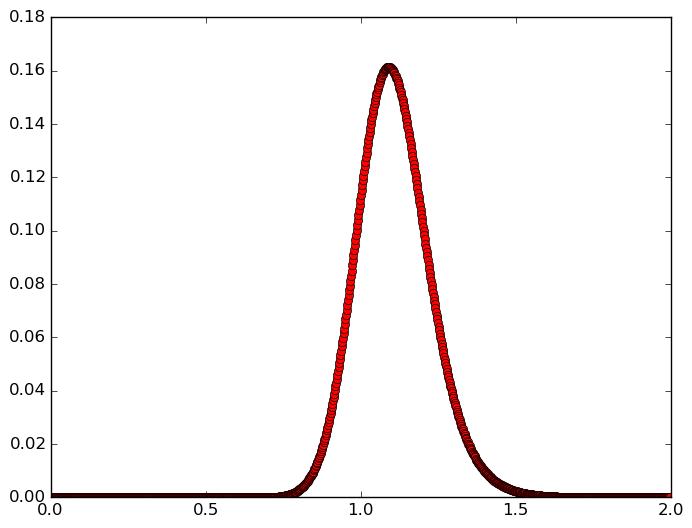

In [19]:
for i in 1:length(tlist)-1
    plot(tlist[i], real(expect[i]), "ro")
end